<a href="https://colab.research.google.com/github/Phrmth/codes/blob/main/Autoencoders_remove_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import required libraries
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
import cv2
from matplotlib.pyplot import imshow
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D

In [6]:
#load mnist data
(X_train,_),(X_test,_) = mnist.load_data()

In [7]:
#scale the data
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [8]:
#reshape the input data
X_train = np.reshape(X_train,(len(X_train),28,28,1))
X_test = np.reshape(X_test,(len(X_test),28,28,1))

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
#artifically adding noise to the input data
noise = .5
X_train_noisy = X_train + noise * np.random.normal(loc= 0.0,scale = 1.0, size = X_train.shape)
X_test_noisy = X_test + noise * np.random.normal(loc= 0.0,scale = 1.0, size = X_test.shape)
X_train_noisy = np.clip(X_train_noisy,0,1)
X_test_noisy = np.clip(X_test_noisy,0,1)

In [12]:
#creating model architecture
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu',padding ='same',input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Conv2D(8,(3,3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding = 'same'))
model.add(Conv2D(8,(3,3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(8,(3,3), activation = 'relu',padding ='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3), activation = 'relu',padding ='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1,(3,3), activation = 'relu',padding ='same'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

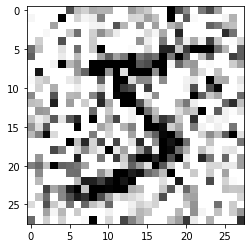

In [10]:
#example of a noisy image
imshow(X_train_noisy[0].reshape(28,28),cmap = 'binary')

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
#fitting the model 
with tf.device('/GPU:0'):
  model.fit(X_train_noisy,X_train,epochs = 10, batch_size=256, shuffle=True, validation_data=(X_test_noisy,X_test))

Epoch 1/10
235/235 [==============================] - 30s 13ms/step - loss: 0.0690 - val_loss: 0.0416
Epoch 2/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0397 - val_loss: 0.0342
Epoch 3/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0338 - val_loss: 0.0307
Epoch 4/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0309 - val_loss: 0.0287
Epoch 5/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0290 - val_loss: 0.0272
Epoch 6/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0276 - val_loss: 0.0264
Epoch 7/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0268 - val_loss: 0.0256
Epoch 8/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0260 - val_loss: 0.0254
Epoch 9/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0256 - val_loss: 0.0248
Epoch 10/10
235/235 [==============================] - 2s 10ms/step - loss: 0.0252 - val_l

In [28]:
#predicting on validation
pred = model.predict(X_test_noisy)

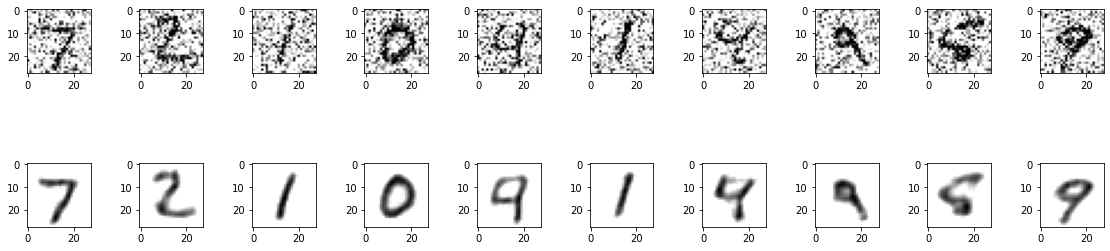

In [34]:
#plotting the predictions against the ground truth
import matplotlib.pyplot as plt
plt.figure(figsize = (40,4))
for i in range(10):
  ax = plt.subplot(3,20,i+1)
  plt.imshow(X_test_noisy[i].reshape(28,28),cmap = 'binary')

  ax = plt.subplot(3,20, 40+i+1)
  plt.imshow(pred[i].reshape(28,28),cmap = 'binary')